In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_set_true = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsRealCOVID-19_5.csv')
train_set_true2 = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsRealCOVID-19_7.csv')
train_set_true3 = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsRealCOVID-19_5.csv')
train_set_true = pd.concat((pd.DataFrame(train_set_true), pd.DataFrame(train_set_true2), pd.DataFrame(train_set_true3)))
train_set_true.head()

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,NaN,"""coronavirus outbreak, viral outbreak, viral i..."
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,NaN,"""screen time, child development, smartphones, ..."
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,NaN,"""covid-19 coronavirus outbreak research progre..."
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,NaN,"""coronavirus, viral infection, viral outbreak,..."
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,NaN,"""covid-19, covornavirus, novel coronavirus, vi..."


In [3]:
train_set_true = train_set_true.drop(['publish_date','Unnamed: 0'],axis=1)

In [4]:
train_set_true.head()

,type,fact_check_url,news_url,title,newstitle,content,abstract,meta_keywords
0,article,healthline.com,https://www.healthline.com/health-news/coronav...,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening st...,the new coronavirus disease outbreak first ide...,"""coronavirus outbreak, viral outbreak, viral i..."
1,article,healthline.com,https://www.healthline.com/health-news/screen-...,"Screen Time Doesn’t Hurt Kids’ Social Skills, ...","""Screen Time Doesn't Hurt Kids' Social Skills,...",a new study finds an increase in screen time d...,new research found that school age children in...,"""screen time, child development, smartphones, ..."
2,article,healthline.com,https://www.healthline.com/health-news/heres-e...,Here’s Exactly Where We Are with Vaccines and ...,"""Where We're at with Vaccines and Treatments f...",scientists around the world are working on a n...,scientists around the world are working on a n...,"""covid-19 coronavirus outbreak research progre..."
3,article,healthline.com,https://www.healthline.com/health-news/heres-w...,Here’s What Happens to the Body After Contract...,"""Here's What Happens to the Body After Contrac...",coronaviruses cause respiratory illnesses so t...,heres what we know so far about how covid-19 a...,"""coronavirus, viral infection, viral outbreak,..."
4,article,healthline.com,https://www.healthline.com/health-news/why-you...,Why You Should Be Skeptical of Early Results o...,"""Why You Should Be Skeptical of Leaked Results...",medical experts are studying if remdesivir can...,with no approved treatment specific for covid-...,"""covid-19, covornavirus, novel coronavirus, vi..."


article    4247
post         56
Name: type, dtype: int64


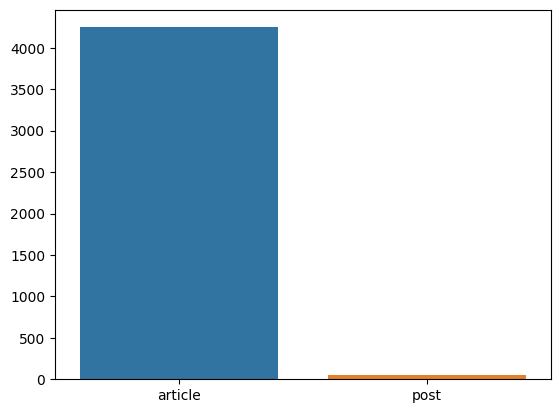

In [5]:
dd = pd.Series(train_set_true['type']).value_counts()
print(dd)
sns.barplot(x=np.array(['article','post']),y=dd.values)
plt.show()

webmd.com                                                                                                               1602
cdc.gov                                                                                                                  934
healthline.com                                                                                                           511
medicalnewstoday.com                                                                                                     489
sciencedaily.com                                                                                                         296
                                                                                                                        ... 
https://www.politifact.com/factchecks/2020/jun/16/desiree-rogers/blacks-hispanics-less-likely-have-jobs-where-they-/       1
https://www.politifact.com/factchecks/2020/jun/08/glenn-grothman/glenn-grothman-target-about-tie-between-vitamin-d-/       1


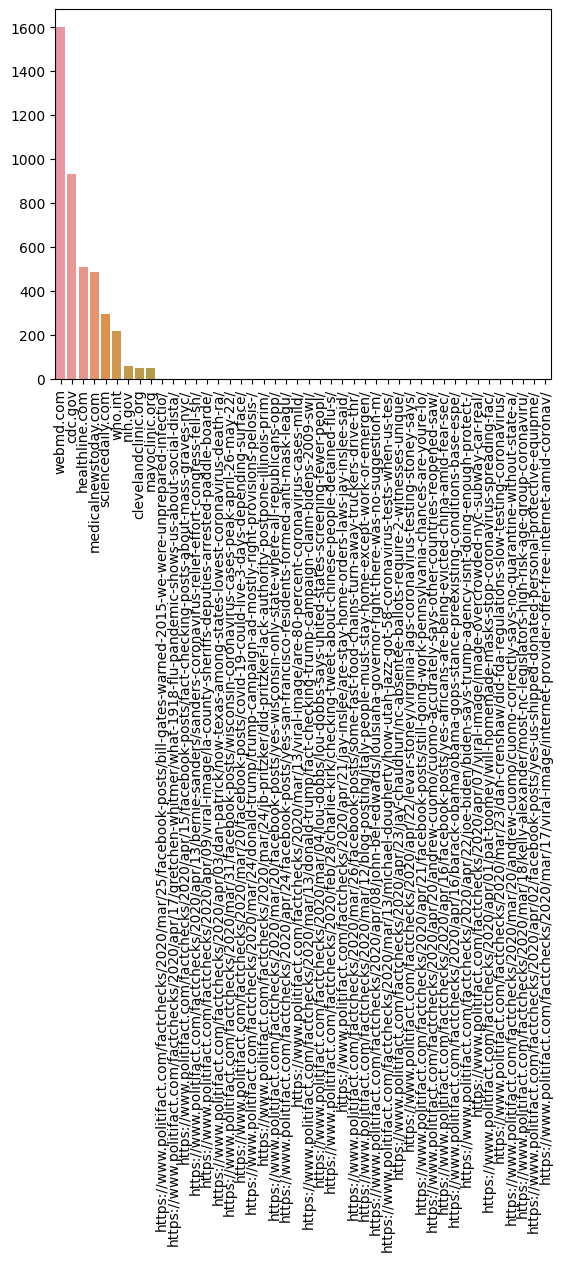

In [6]:
dd = pd.Series(train_set_true['fact_check_url']).value_counts()
print(dd)
unique_urls = []
values = []
# Didn't include the links which had less than 1 article/post
for i in range(0,len(dd)):
    if(dd[i]>1):
        unique_urls.append(dd.index[i])
        values.append(dd[i])
sns.barplot(x=np.array(unique_urls),y=values)
plt.xticks(rotation=90)
plt.show()

In [7]:
train_set_false = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsFakeCOVID-19_5.csv')
train_set_false2 = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsFakeCOVID-19_7.csv')
train_set_false3 = pd.read_csv(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\NLP Dataset\Covid 19 Fake news\NewsFakeCOVID-19.csv')
train_set_false = pd.concat((pd.DataFrame(train_set_false),pd.DataFrame(train_set_false2),pd.DataFrame(train_set_false3)))
train_set_false.head()

,Unnamed: 0,type,fact_check_url,archieve,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords
0,0,post,https://factcheck.afp.com/false-advice-refusin...,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960...,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN,NaN
1,1,article,https://www.politifact.com/factchecks/2020/apr...,NaN,http://legis.wisconsin.gov/assembly/republican...,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,NaN,""""""
2,2,post,https://factcheck.afp.com/posts-claim-children...,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a....,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN,NaN
3,3,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/kokernagnews/photos/a...,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN,NaN
4,5,post,https://checkyourfact.com/2020/04/20/fact-chec...,NaN,https://www.facebook.com/photo.php?fbid=102193...,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN,NaN


In [8]:
train_set_false = train_set_false.drop(['publish_date','Unnamed: 0','news_url2','news_url3','news_url4','news_url5','archieve'],axis=1)

In [9]:
train_set_false.head()

,type,fact_check_url,news_url,title,newstitle,content,abstract,meta_keywords
0,post,https://factcheck.afp.com/false-advice-refusin...,https://www.facebook.com/photo.php?fbid=551960...,Facebook posts shared in at least three countr...,NaN,NaN,NaN,NaN
1,article,https://www.politifact.com/factchecks/2020/apr...,http://legis.wisconsin.gov/assembly/republican...,Wisconsin is Òclearly seeing a decline in COVI...,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate major...,NaN,""""""
2,post,https://factcheck.afp.com/posts-claim-children...,https://www.facebook.com/iAmJessenia/photos/a....,Facebook posts claim a child who is infected w...,NaN,NaN,NaN,NaN
3,post,https://checkyourfact.com/2020/04/20/fact-chec...,https://www.facebook.com/kokernagnews/photos/a...,IndiaÕs Ministry of Home Affairs banning citiz...,NaN,NaN,NaN,NaN
4,post,https://checkyourfact.com/2020/04/20/fact-chec...,https://www.facebook.com/photo.php?fbid=102193...,"42 Democratic senators, plus two Independents,...",NaN,NaN,NaN,NaN


post       650
article    204
Name: type, dtype: int64


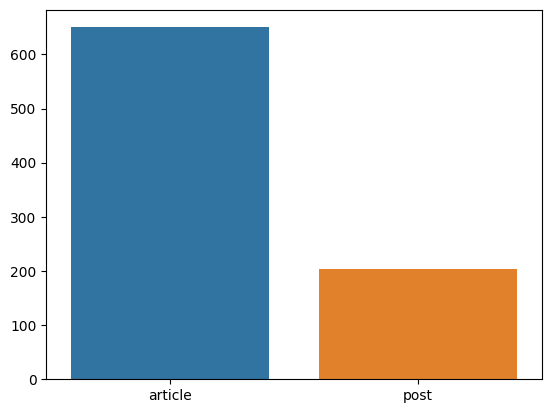

In [10]:
dd = pd.Series(train_set_false['type']).value_counts()
print(dd)
sns.barplot(x=np.array(['article','post']),y=dd.values)
plt.show()

https://www.facebook.com/vitalcliposomalvitaminc/posts/1250287675180935?__tn__=-R                   4
https://www.facebook.com/isaiah.rastetter/posts/3336961516376285                                    4
https://www.toine360.com/post/hair-weave-and-lace-front-made-in-china-may-contain-coronavirus       4
https://www.facebook.com/photo.php?fbid=10218901178914261&set=a.10204847434659438&type=3&theater    3
https://www.facebook.com/sandra.feno/posts/3869474993092657                                         3
                                                                                                   ..
https://www.facebook.com/permalink.php?story_fbid=2775217729264939&id=445605908892811&__tn__=-R     1
https://www.instagram.com/p/B92C5PCHXlv/?utm_source=ig_embed                                        1
https://www.facebook.com/watch/?v=220677042452646                                                   1
https://www.facebook.com/groups/DonaldTrump2020/permalink/1043930519383101/       

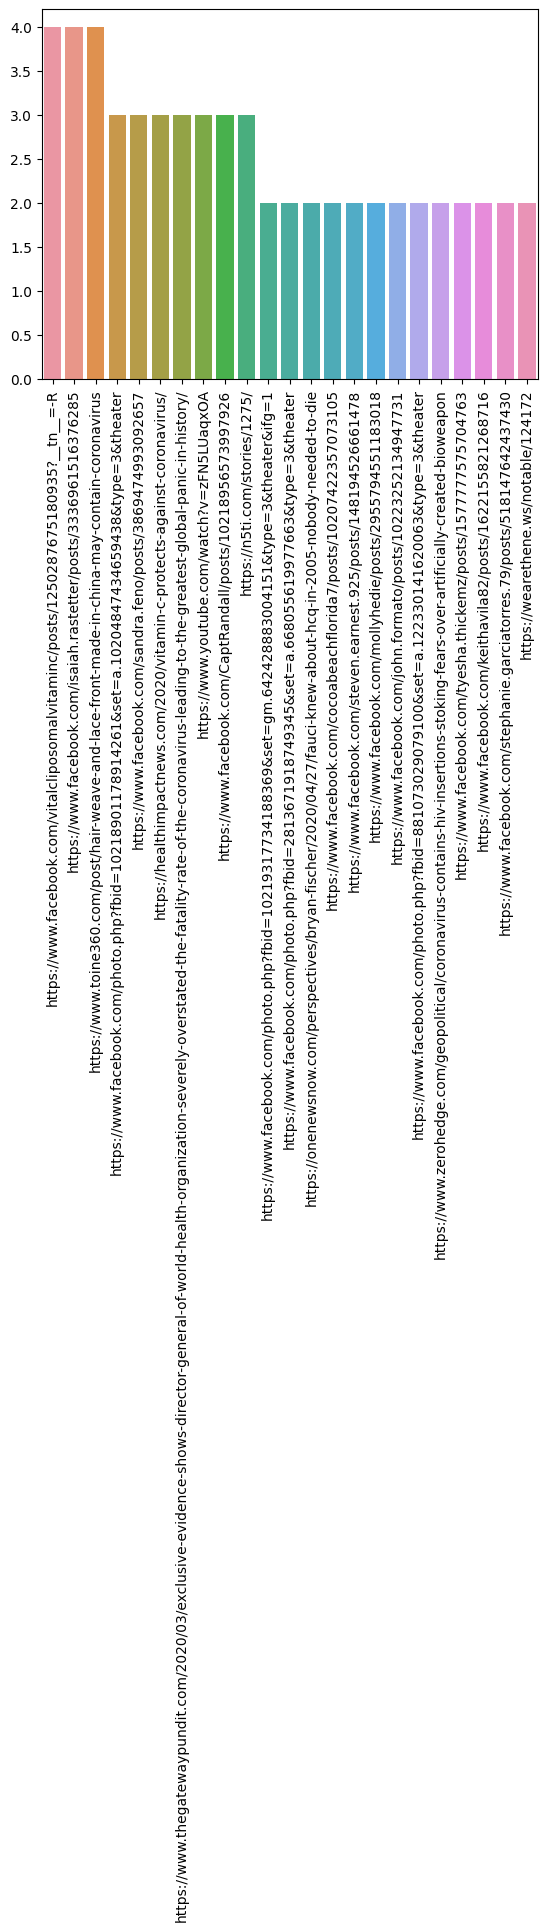

In [11]:
dd = pd.Series(train_set_false['news_url']).value_counts()
print(dd)
unique_urls = []
values = []
# Didn't include the links which had less than 1 article/post
for i in range(0,len(dd)):
    if(dd[i]>1):
        unique_urls.append(dd.index[i])
        values.append(dd[i])
sns.barplot(x=np.array(unique_urls),y=values)
plt.xticks(rotation=90)
plt.show()

In [12]:
train_set_false = train_set_false.drop(['newstitle', 'content', 'abstract', 'meta_keywords','type', 'fact_check_url', 'news_url'],axis=1)
train_set_true = train_set_true.drop(['newstitle', 'content', 'abstract', 'meta_keywords','type', 'fact_check_url', 'news_url'],axis=1)
for i in train_set_false:
    print(i,end=", ")
print()
for i in train_set_true:
    print(i,end=', ')
print()
train_set_false.shape

title, 
title, 


(894, 1)

In [13]:
x = pd.concat((train_set_false,train_set_true)).squeeze()
real_news = [1]*train_set_true.shape[0]
fake_news = [0]*train_set_false.shape[0]
y = pd.Series(fake_news+real_news)
print(x.shape)
print(y.shape)

(5201,)
(5201,)


In [14]:
from sklearn.model_selection import train_test_split
x_train, y_train ,x_test,y_test= train_test_split(x,y,test_size=0.7,stratify=y,shuffle=True)

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

def preprocess_string(s):
    s = re.sub(r"[^\w\s]", '', s) # Removing All non words (Basically only Alphanumeric is allowed)
    s = re.sub(r"\s+", '', s) # Removing the whitespaces
    s = re.sub(r"\d", '', s) # Replace the digits with no space
    return s

def tokenize(x_train,y_train,x_val,y_val):
    word_list = []


    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)
 
    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
   
    # tokenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])   
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])
           
    encoded_train = [1 if label == 1 else 0 for label in y_train]  
    encoded_test = [1 if label == 1 else 0 for label in y_val]
    print(len(final_list_train),len(final_list_test))
    return (np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict)


x_train,y_train,x_test,y_test,vocab = tokenize(x_train,y_train,x_test,y_test)

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
print(y_train)

[0 0 0 0]


<AxesSubplot: >

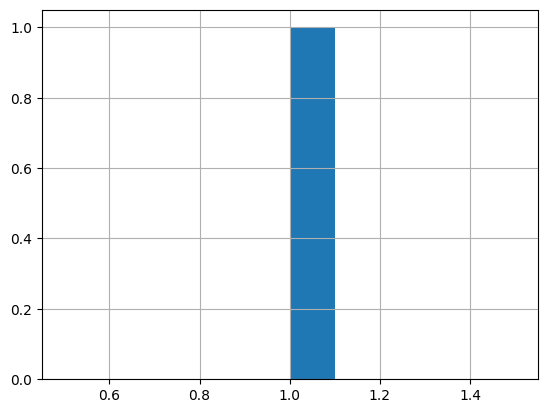

In [ ]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len[0]).hist()

In [ ]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features


x_train_pad = padding_(x_train,500)
x_test_pad = padding_(x_test,500)